# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Tessa Agitha Irwani Br barus
- Email: tessairwani@gmail.com
- Id Dicoding: milkycleanser

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan tren peminjaman sepeda harian antara tahun 2011 dan 2012, dan apakah terdapat kenaikan atau penurunan yang signifikan?
2. Bagaimana cuaca mempengaruhi tingkat peminjaman harian sepeda? Adakah pola yang menunjukkan bahwa kondisi cuaca tertentu dapat meningkatkan atau menurunkan jumlah peminjaman?
3. Apakah ada musim tertentu yang menunjukkan tingkat peminjaman sepeda harian yang berbeda dari tahun 2011 hingga 2012?
4. Adakah pola peminjaman sepeda harian yang berkaitan dengan jam dalam sehari pada tahun 2011 dan 2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/redshoes11/DatasetProyekAkhirDicoding/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/redshoes11/DatasetProyekAkhirDicoding/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- terdapat column yang memiliki tipe data tidak sesuai, seperti dteday yang seharusnya adalah tipe data date and time dan tipe data kategorikal untuk season, yr, mnth, holiday, weekday, workingday, dan whetersit.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada masalah dengan sebaran data, duplikasi data, dan inaccurate value pada data day_df.

#### Menilai data hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- terdapat column yang memiliki tipe data tidak sesuai, seperti dtday yang seharusnya adalah tipe data date and time dan tipe data kategorikal untuk season, yr, mnth, holiday, weekday, workingday, dan whetersit.

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada masalah dengan sebaran data, duplikasi data, dan inaccurate value pada data hour_df.

### Cleaning Data

#### Menangani tipe data yang salah (day_df)

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [9]:
categories_day_column = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for column in categories_day_column:
  day_df[column] = day_df[column].astype('category')

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [11]:
day_df.describe(include="all")

<ipython-input-11-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [12]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Menangani tipe data yang salah (hour_df)

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
categories_hour_column = ["season", "yr", "mnth","hr", "holiday", "weekday", "workingday", "weathersit"]

for column in categories_hour_column:
  hour_df[column] = hour_df[column].astype('category')

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Melakukan Eksplorasi Data day_df

In [16]:
day_df.describe(include="all")

<ipython-input-16-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Standart deviasi untuk kolom casual, registered dan cnt termasuk besar sehingga menunjukkan variasi yang besar pada data.

In [17]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

- yr=0 mewakili tahun 2011
- yr=1 mewakili tahun 2012
- disimpulkan bahwa jumlah Bike Sharing Harian tertinggi dan terendah ada pada tahun 2012 yaitu sebesar 8714 dan 22.

In [18]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

- season = 1 mewakili Spring
- season = 2 mewakili Summer
- season = 3 mewakili Fall
- season = 4 mewakili Winter
- dapat disimpulkan bahwa Bike Sharing Harian tertinggi ada pada musim Fall yaitu sebesar 8714 dan Bike Sharing Harian terendah ada pada musim Winter yaitu sebesar 22.

In [19]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
     nunique   max   min         mean          std
mnth                                              
1         62  4521   431  2176.338710  1161.674370
2         57  5062  1005  2655.298246  1145.313307
3         62  8362   605  3692.258065  1899.301812
4         60  7460   795  4484.900000  1776.160778
5         62  8294  2633  5349.774194  1298.711561
6         60  8120  3767  5772.366667  1240.400031
7         62  8173  3285  5563.677419  1273.751871
8         62  7865  1115  5664.419355  1494.516146
9         60  8714  1842  5766.516667  1810.130649
10        62  8156    22  5199.225806  1988.392517
11        60  6852  1495  4247.183333  1285.712709
12        62  6606   441  3403.806452  1549.639353

In [20]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

In [21]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [22]:
day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [23]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

### Melakukan eksplorasi data hour_df

In [24]:
hour_df.describe(include="all")

<ipython-input-24-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Standart deviasi untuk kolom casual, registered dan cnt termasuk besar sehingga menunjukkan variasi yang cukup besar pada data.

In [25]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

### Ekplorasi Tambahan

Nilai Korelasi atribut pada day_df

<ipython-input-26-55ef075dcfe8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


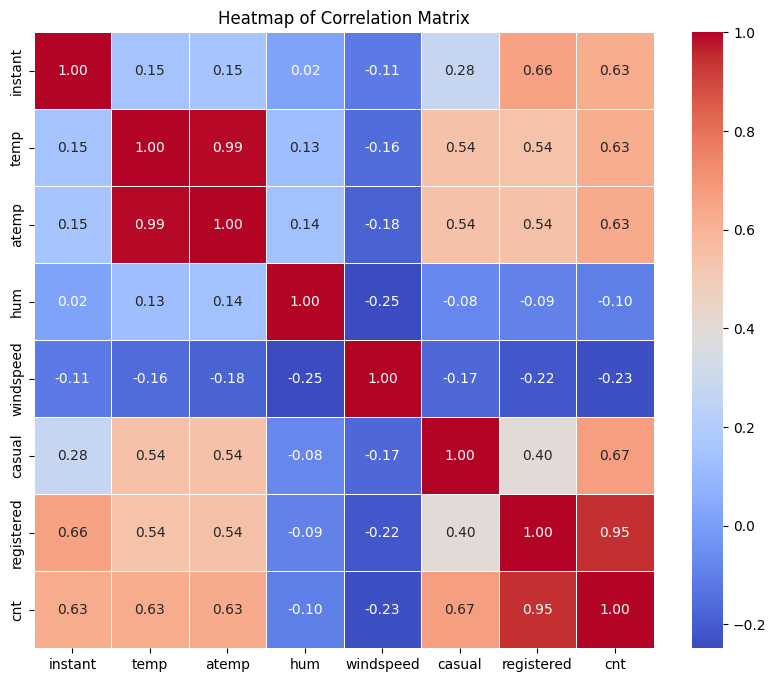

In [26]:
correlation_matrix = day_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Nilai Korelasi atribut pada hour_df

<ipython-input-27-6bc88a1d51f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hour_df.corr()


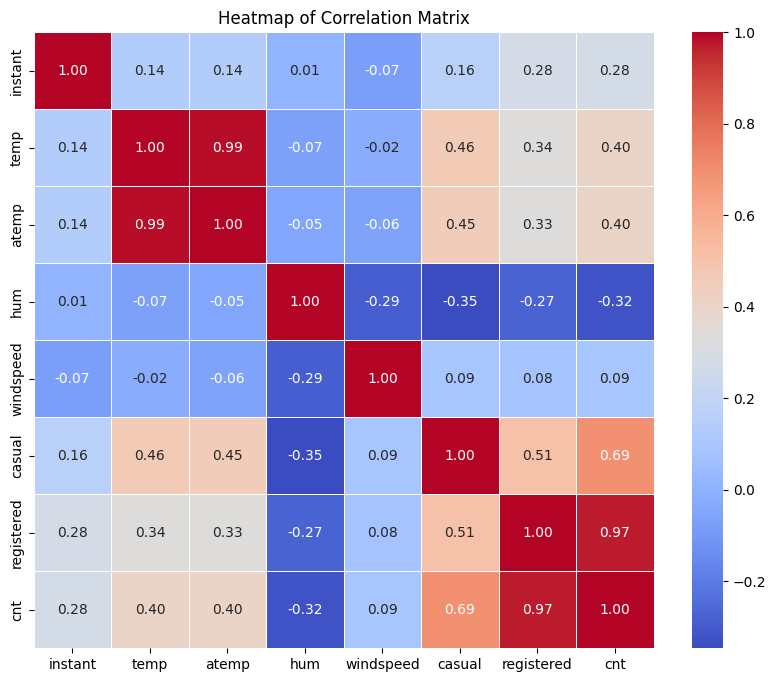

In [27]:
correlation_matrix = hour_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Visualization & Explanatory Analysis

 ### Pertanyaan 1: Bagaimana perbandingan tren peminjaman sepeda harian antara tahun 2011 dan 2012, dan apakah terdapat kenaikan atau penurunan yang signifikan?

In [28]:
monthly2011_df = hour_df[hour_df['dteday'].dt.year == 2011]

monthly2011_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
monthly2011_sharing_df = monthly2011_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})

monthly2011_sharing_df.index = monthly2011_sharing_df.index.strftime('%Y-%m')
monthly2011_sharing_df = monthly2011_sharing_df.reset_index()
monthly2011_sharing_df.rename(columns={
    "instant": "sharing_count",
    "cnt": "total_sharing"
}, inplace=True)

monthly2011_sharing_df

,dteday,sharing_count,total_sharing
0,2011-01,688,38189
1,2011-02,649,48215
2,2011-03,730,64045
3,2011-04,719,94870
4,2011-05,744,135821
5,2011-06,720,143512
6,2011-07,744,141341
7,2011-08,731,136691
8,2011-09,717,127418
9,2011-10,743,123511


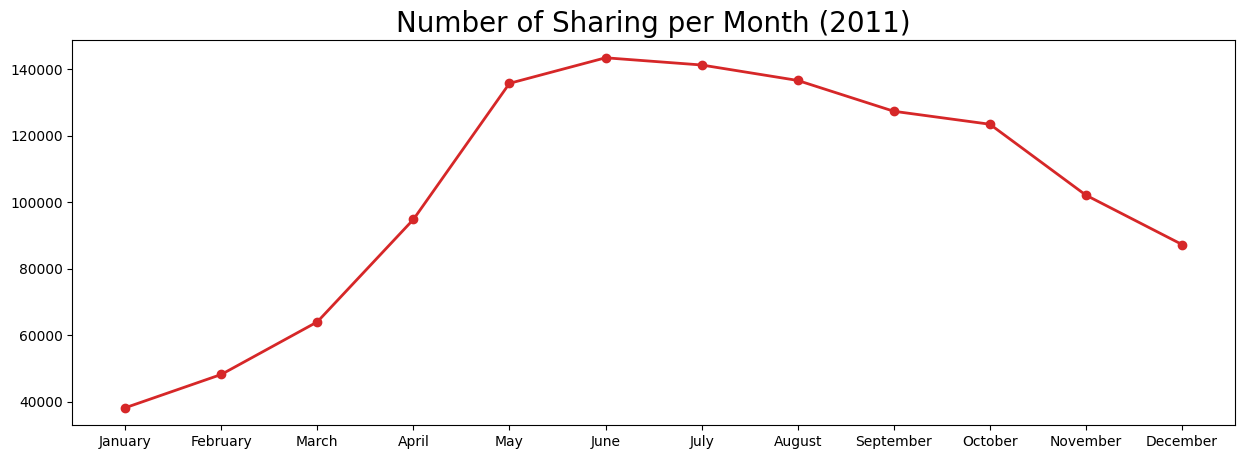

In [30]:
monthly2011_sharing_df = monthly2011_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly2011_sharing_df.index = monthly2011_sharing_df.index.strftime('%B') # mengubah format order date menjadi nama bulan

monthly2011_sharing_df = monthly2011_sharing_df.reset_index()
monthly2011_sharing_df.rename(columns={
    "instant": "sharing_id",
    "cnt": "total_sharing"
}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(monthly2011_sharing_df["dteday"], monthly2011_sharing_df["total_sharing"], marker='o', linewidth=2, color='C3')
plt.title("Number of Sharing per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
monthly2012_df = hour_df[hour_df['dteday'].dt.year == 2012]

monthly2012_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
8648,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
8649,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8


In [32]:
monthly2012_sharing_df = monthly2012_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})

monthly2012_sharing_df.index = monthly2012_sharing_df.index.strftime('%Y-%m')
monthly2012_sharing_df = monthly2012_sharing_df.reset_index()
monthly2012_sharing_df.rename(columns={
    "instant": "sharing_count",
    "cnt": "total_sharing"
}, inplace=True)

monthly2012_sharing_df

,dteday,sharing_count,total_sharing
0,2012-01,741,96744
1,2012-02,692,103137
2,2012-03,743,164875
3,2012-04,718,174224
4,2012-05,744,195865
5,2012-06,720,202830
6,2012-07,744,203607
7,2012-08,744,214503
8,2012-09,720,218573
9,2012-10,708,198841


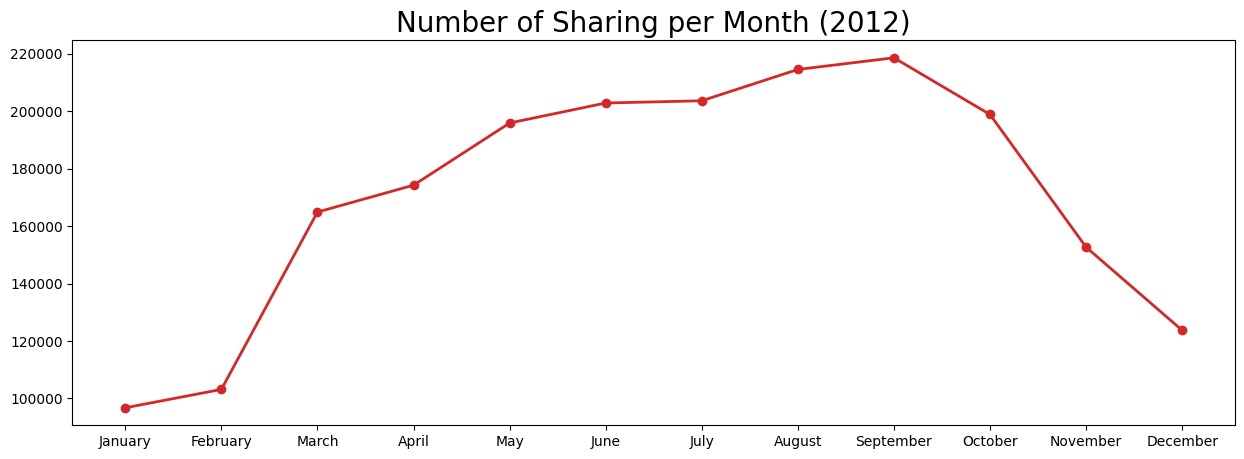

In [33]:
monthly2012_sharing_df = monthly2012_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly2012_sharing_df.index = monthly2012_sharing_df.index.strftime('%B') # mengubah format order date menjadi nama bulan

monthly2012_sharing_df = monthly2012_sharing_df.reset_index()
monthly2012_sharing_df.rename(columns={
    "instant": "sharing_id",
    "cnt": "total_sharing"
}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(monthly2012_sharing_df["dteday"], monthly2012_sharing_df["total_sharing"], marker='o', linewidth=2, color="C3")
plt.title("Number of Sharing per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana cuaca mempengaruhi tingkat peminjaman harian sepeda? Adakah pola yang menunjukkan bahwa kondisi cuaca tertentu dapat meningkatkan atau menurunkan jumlah peminjaman?

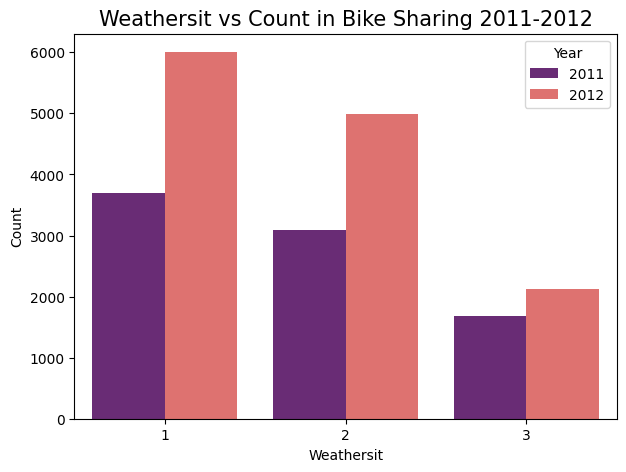

In [34]:
f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=day_df, x="weathersit", y="cnt", hue="yr", errorbar=None, palette='magma')
ax.set_ylabel('Count')
ax.set_xlabel('Weathersit')
ax.set_title("Weathersit vs Count in Bike Sharing 2011-2012", loc="center", fontsize=15)

plt.legend(title='Year', labels=['2011', '2012'])

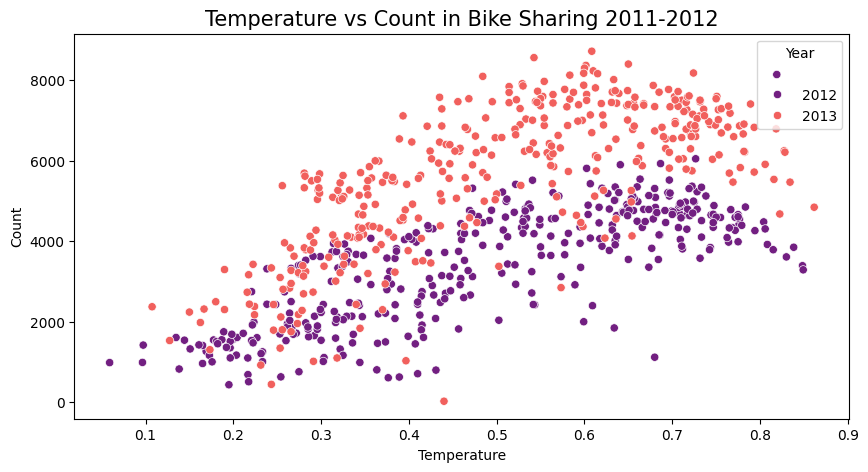

In [35]:
f, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', hue='yr', data=day_df, palette='magma')
ax.set_ylabel('Count')
ax.set_xlabel('Temperature')
ax.set_title("Temperature vs Count in Bike Sharing 2011-2012", loc="center", fontsize=15)

plt.legend(title='Year', labels=['', '2012', '2013'])

### Pertanyaan 3: Apakah ada musim tertentu yang memiliki tingkat peminjaman sepeda harian dari tahun 2011 hingga 2012?

In [36]:
season_sharing_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
season_sharing_df['season'] = season_sharing_df['season'].astype(str)
category_mapping = {'1': 'Spring', '2': 'Summer', '3': 'Fall', '4': 'Winter'}
season_sharing_df['season'].replace(category_mapping, inplace=True)
season_sharing_df['season'] = season_sharing_df['season'].astype('category')
season_sharing_df

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<ipython-input-37-83c6765be67f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="season", data=season_sharing_df, palette='magma')


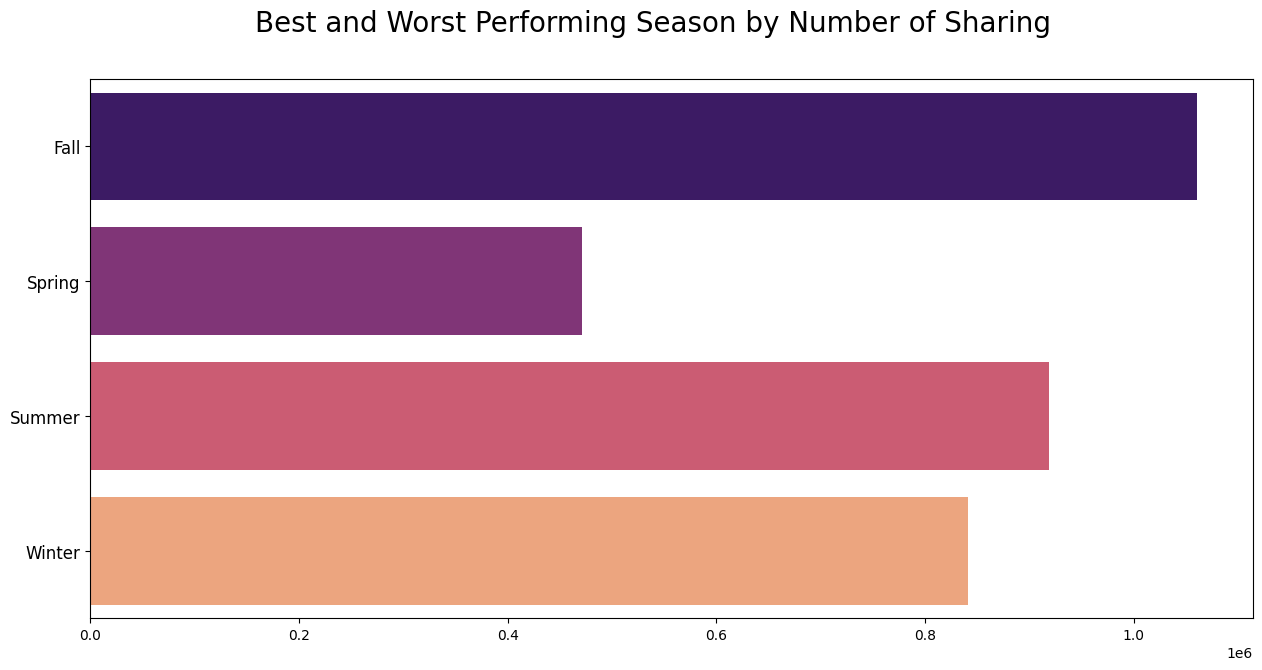

In [37]:
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

sns.barplot(x="cnt", y="season", data=season_sharing_df, palette='magma')
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Best and Worst Performing Season by Number of Sharing", fontsize=20)
plt.show()

### Pertanyaan 4: Adakah pola peminjaman sepeda harian yang berkaitan dengan jam dalam sehari pada tahun 2011 dan 2012?

In [38]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

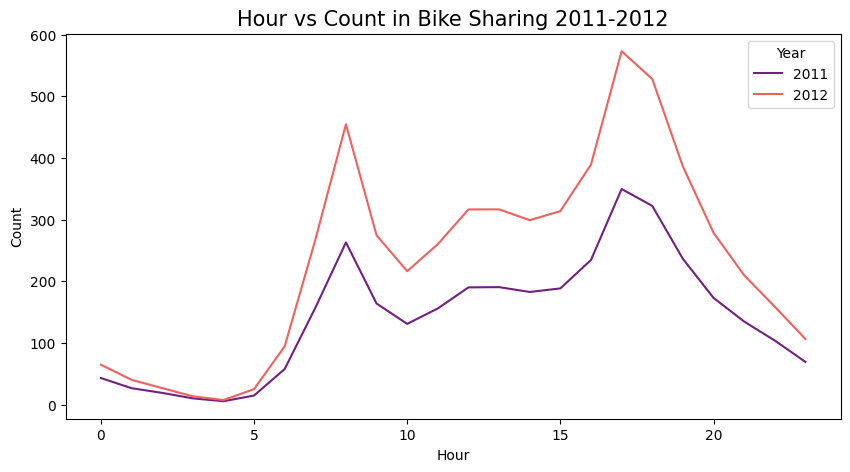

In [39]:
f, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x='hr', y='cnt', data=hour_df, hue='yr', errorbar=None, palette='magma')
ax.set_ylabel('Count')
ax.set_xlabel('Hour')
ax.set_title("Hour vs Count in Bike Sharing 2011-2012", loc="center", fontsize=15)

plt.legend(title='Year', labels=['2011', '2012'])

## Conclusion


1.   Bagaimana perbandingan tren peminjaman sepeda harian antara tahun 2011 dan 2012, dan apakah terdapat kenaikan atau penurunan yang signifikan?

     Jawaban :
     
     Tren peminjaman sepeda harian pada tahun 2011 mengalami kenaikan pada bulan Januari hingga Juni dan mengalami penurunan yang signifikan pada bulan November dan Desember. Tingkat peminjaman sepeda harian tertinggi pada tahun 2011 adalah pada bulan Juni yaitu sebesar 143512 peminjaman.
     
     Sedangkan, Tren peminjaman sepeda harian pada tahun 2012 mengalami kenaikan pada bulan Januari hingga September dan mengalami penurunan signifikan pada bulan November dan desember. Tingkat peminjaman sepeda harian tertinggi pada tahun 2012 adalah pada bulan September yaitu sebesar 218573 peminjaman.

2.   Bagaimana cuaca mempengaruhi tingkat peminjaman harian sepeda? Adakah pola yang menunjukkan bahwa kondisi cuaca tertentu dapat meningkatkan atau menurunkan jumlah peminjaman?

     Jawaban:
     
     Bedasarkan dari data yang telah dianalisis, Cuaca mempengaruhi tingkat peminjaman sepeda. Tingkat peminjaman sepeda meningkat ketika cuaca Cerah dan mengalami penurunan pada saat Hujan ringan. Tingkat peminjaman akan meningkat seiring temperatur udara juga meningkat dan tingkat peminjaman akan menurun seiring temperatur udara menurun.

3.   Apakah ada musim tertentu yang memiliki tingkat peminjaman sepeda harian dari tahun 2011 hingga 2012?

     Jawaban :

     Musim Fall (gugur) memiliki tingkat peminjaman sepeda harian tertinggi dari tahun 2011 hingga 2012 yaitu sebesar 1061129 peminjaman.

4.   Adakah pola peminjaman sepeda harian yang berkaitan dengan jam dalam sehari pada tahun 2011 dan 2012?

     Jawaban :

     Pola peminjaman sepeda yang berkaitan dengan jam dalam sehari pada tahun 2011 dan 2012  memiliki pola yang sama. Pada jam 5 hingga jam 8 pagi, tingkat peminjaman mengalami kenaikan yang signifikan. sedangkan pada jam 6 sore hingga jam 12 malam, tingkat peminjaman mengalami penurunan yang signifikan.

In [40]:
day_df.to_csv("day_data.csv", index=False)
hour_df.to_csv("hour_data.csv", index=False)

## Analisis Lanjutan (K-Means Clustering)

Clustering akan digunakan untuk memahami karakteristik harian seperti temperatur cuaca yang mempengaruhi jumlah peminjaman sepeda, yang dapat membantu dalam perencanaan operasional dan alokasi sumber daya.

### Inisialisasi Data

In [109]:
# Memilih kolom-kolom yang digunakan untuk K-means Clustering
day_df_cluster = day_df[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered' ]]

In [110]:
day_df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        731 non-null    float64
 1   atemp       731 non-null    float64
 2   hum         731 non-null    float64
 3   windspeed   731 non-null    float64
 4   casual      731 non-null    int64  
 5   registered  731 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 34.4 KB


### Normalisasi Data

In [111]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

day_df_cluster['temp'] = min_max_scaling(day_df_cluster['temp'])
day_df_cluster['atemp'] = min_max_scaling(day_df_cluster['atemp'])
day_df_cluster['hum'] = min_max_scaling(day_df_cluster['hum'])
day_df_cluster['windspeed'] = min_max_scaling(day_df_cluster['windspeed'])
day_df_cluster['casual'] = min_max_scaling(day_df_cluster['casual'])
day_df_cluster['registered'] = min_max_scaling(day_df_cluster['registered'])


<ipython-input-111-bcdae09bc666>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_cluster['temp'] = min_max_scaling(day_df_cluster['temp'])
<ipython-input-111-bcdae09bc666>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_cluster['atemp'] = min_max_scaling(day_df_cluster['atemp'])
<ipython-input-111-bcdae09bc666>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [112]:
correlation_matrix = day_df_cluster[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']].corr()
print(correlation_matrix)


                temp     atemp       hum  windspeed    casual  registered
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000


In [113]:
day_df_cluster.describe()


,temp,atemp,hum,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.543594,0.518864,0.645649,0.346536,0.248291,0.525003
std,0.228091,0.213909,0.146457,0.159766,0.201474,0.225275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346343,0.339674,0.534704,0.232045,0.091989,0.357638
50%,0.547268,0.535113,0.644388,0.326928,0.208627,0.525845
75%,0.743002,0.695083,0.750857,0.434622,0.321009,0.686760
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pemilihan Jumlah Cluster (K) menggunakan Elbow Method

In [114]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data yang sudah dinormalisasi
X = day_df_cluster[['temp', 'registered']]

# Range nilai k
k_values = range(1, 11)

# Inisialisasi list untuk menyimpan inersia (within-cluster sum of squares) untuk setiap nilai k
inertia_values = []

# Uji K-means clustering dengan berbagai nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=30)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

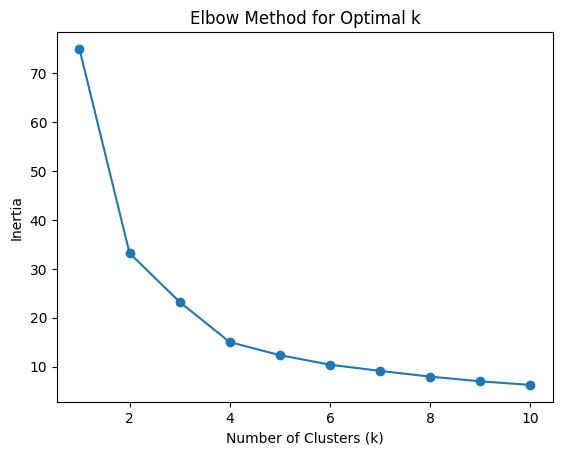

In [115]:
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Berdasarkan grafik diatas dapat kita ketahui dengan melihat elbow ada pada nilai k=4

### Pembuatan Model

In [116]:
from sklearn.cluster import KMeans

k = 4

kmeansmodel = KMeans(n_clusters= k, init='k-means++', random_state=30)
y_kmeans =  kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualisasi Cluster

<ipython-input-120-565c5a7e2a6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_cluster['Custom_Labels'] = ['Cluster 1' if label == 0 else 'Cluster 2' if label == 1 else 'Cluster 3' if label == 2 else 'Cluster 4' for label in y_kmeans]


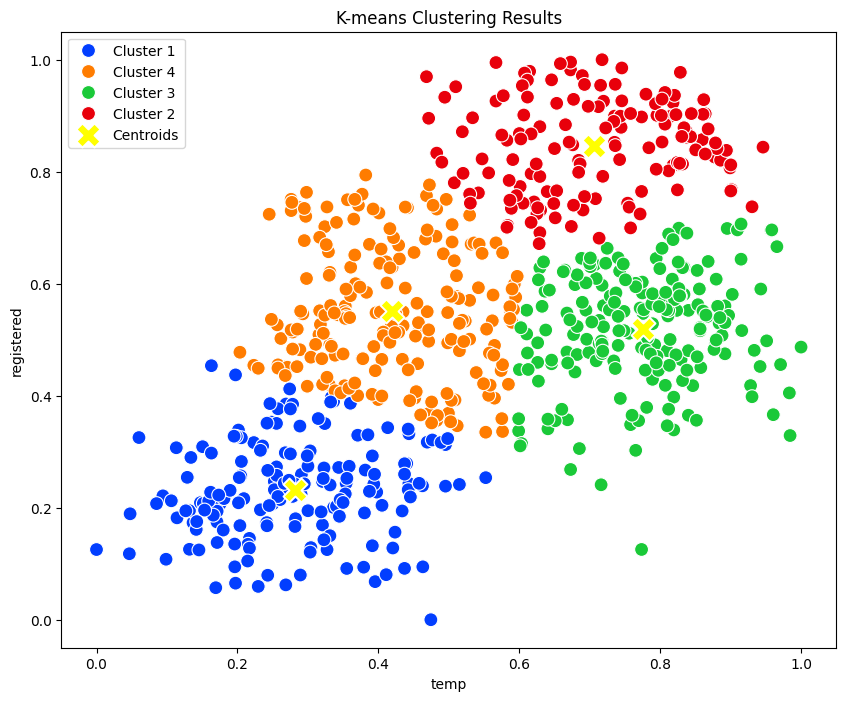

In [120]:
import seaborn as sns

# Menyiapkan data untuk Seaborn
day_df_cluster['Custom_Labels'] = ['Cluster 1' if label == 0 else 'Cluster 2' if label == 1 else 'Cluster 3' if label == 2 else 'Cluster 4' for label in y_kmeans]

# Membuat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='temp', y='registered', hue='Custom_Labels', palette='bright', data=day_df_cluster, s=100)

# Menambahkan centroid ke dalam plot
sns.scatterplot(x=kmeansmodel.cluster_centers_[:, 0], y=kmeansmodel.cluster_centers_[:, 1], color='yellow', marker='X', s=300, label='Centroids')

# Menambahkan label dan legenda
plt.xlabel('temp')
plt.ylabel('registered')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()


- Cluster 1 (Biru) : Temperatur suhu harian rendah dan jumlah penyewa terdaftar lebih sedikit.
- Cluster 2 (Merah) : Temperatur suhu harian tinggi dan jumlah penyewa sepeda terdaftar lebih banyak.
- Cluster 3 (Hijau) : Temperatur suhu harian tinggi tetapi jumlah penyewa sepeda terdaftar sedang (tidak tinggi maupun rendah)
- Cluster 4 (Orange) : Temperatur suhu harian dan jumlah penyewa terdaftar adalah sedang/normal

# Requirements

In [121]:
!pip freeze > requirements.txt

In [122]:
!cat requirements.txt


absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.0
bigframes==0.21.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.42
branca==0.7.1
build==1.0.3
CacheControl==0.14.0
cachetools==5.3.2
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.3
cufflinks==0.17.3
cupy-cuda12x==12.2.0


In [123]:
from google.colab import files

files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>